# Laboratorio 3

Integrantes:

*Jessica Robles*

*Maria Paula Gonzalez*

*Juan Esteban Vergara*

## 1. Importar librerias

In [1]:
seed = 161
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats

## 2. Manejo de los datos

### Carga de datos

In [2]:
# Se cargan los datos. 
df_original = pd.read_csv('202220_Laboratorio_3_data_university_admission_train.csv', index_col=0)
df_info = df_original.copy()
print(df_info.shape)
df_info.head(5)

(1569, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
0,479,327,113,4,4.00,2.77,8.88,1,84.47
1,446,301,92,1,1.85,1.50,7.71,0,45.08
2,336,297,100,1,2.41,1.59,7.89,0,47.42
3,20,303,98,3,3.50,3.00,8.50,0,62.00
4,432,320,94,2,1.38,3.50,8.78,1,73.00


### Informacion de los datos

In [3]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1569 entries, 0 to 1568
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         1569 non-null   int64  
 1   GRE Score          1569 non-null   int64  
 2   TOEFL Score        1569 non-null   int64  
 3   University Rating  1569 non-null   int64  
 4   SOP                1569 non-null   float64
 5   LOR                1569 non-null   float64
 6   CGPA               1569 non-null   float64
 7   Research           1569 non-null   int64  
 8   Admission Points   1504 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 122.6 KB


Podemos observar que hay nulos en la columna Admission Points.

In [4]:
df_info.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1504.000000
mean,239.022945,307.669216,101.632250,2.873805,2.980848,3.013907,8.342231,0.469726,66.744328
std,149.802641,17.857559,12.386238,1.245147,1.234802,1.214377,0.812729,0.499242,19.253029
min,1.000000,257.000000,69.000000,1.000000,0.020000,0.000000,6.100000,0.000000,34.000000
25%,94.000000,298.000000,96.000000,2.000000,2.000000,2.050000,7.750000,0.000000,48.000000
50%,236.000000,309.000000,104.000000,3.000000,3.000000,3.000000,8.330000,0.000000,67.000000
75%,377.000000,322.000000,111.000000,4.000000,4.000000,4.000000,9.040000,1.000000,84.000000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,145.500000


Los datos relacionados a el proyecto originalmente contaban con 9 columnas: 

* Serial No.: Esta columna hace referencia 
al id único de cada estudiante. Consideramos que esta columna no es necesaria para hacer la regresión, ya que no tiene relación con el puntaje de admisión, y al momento de hacer la correlación nos saldrían valores muy bajitos. 

* GRE Score: Es una métrica numérica relacionada al rendimiento académico. Consideramos que puede ser importante al momento de hacer la correlación ya que el rendimiento académico debe ser influyente al momento de obtener el puntaje de admisión de un estudiante. 

* TOEFL Score: Hace referencia a el puntaje en el TOEFL. Esta variable puede llegar a influir en la regresión. Sin embargo, no será un valor muy alto ya que esta no es la única manera de medir el nivel de dominio de lenguas extranjeras en un estudiante, y aparte, no es algo que sea indispensable al momento de hacer una maestría (a pesar de que si sea importante). 

* University Rating: Esta puede ser una variable importante, ya que demuestra la calidad de la institución en la cual el estudiante recibió las bases para su curso de maestría. 

* SOP: Esta consideramos que no es una variable tan importante, ya que la declaración del propósito no es influye al momento de hacer la evaluación para ingresar a la maestría. 

* LOR: Consideramos que no es una variable altamente correlacionada, ya que la carta de recomendación no es importante al momento de hacer la evaluación para ingresar a la maestría. 

* CPGA: Consideramos que esta es una variable importante, ya que demuestra los resultados obtenidos por el estudiante en la institución en la cual se recibieron las bases para su curso de maestría. 

* Research Experience: esta podría llegar a ser una columna importante, ya que la investigación es algo que aporta mucho en la maestría, y por esto, es necesario tener experiencia en este campo.  

* Admission Points: esta es la variable objetivo, aquella que se busca predecir con nuestro modelo. 

### Limpieza de datos

In [5]:
df_info_clean = df_info.copy()

Al revisar la cantidad de nulos pudimos encontrar que la única columna que contenía datos nulos es la columna de la variable objetivo. Sin embargo, como la cantidad de nulos en esta columna era muy pequeña no vimos problema en eliminar aquellos registros que tuvieran valores nulos, y así generar el modelo. 

In [6]:
df_info_clean = df_info_clean.dropna(axis=0, subset=["Admission Points"])

Se elimina la columna "Serial No." porque es un valor unico que representa el id de un estudiante, por lo tanto, no esta relacionado a el puntaje de admision.

In [7]:
df_info_clean = df_info_clean.drop(["Serial No."], axis=1)

### Quitar datos atipicos

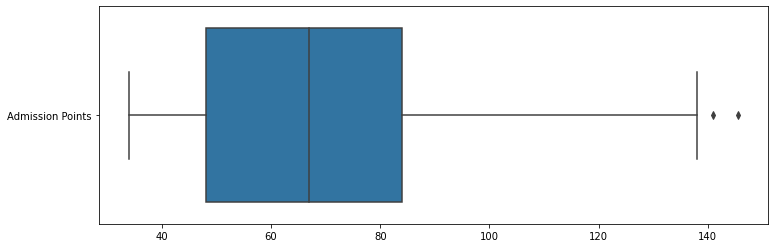

In [8]:
# Diagrama de caja
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= df_info_clean[['Admission Points']], orient="h")

In [9]:
df_info_clean = df_info_clean[df_info_clean['Admission Points']<140]

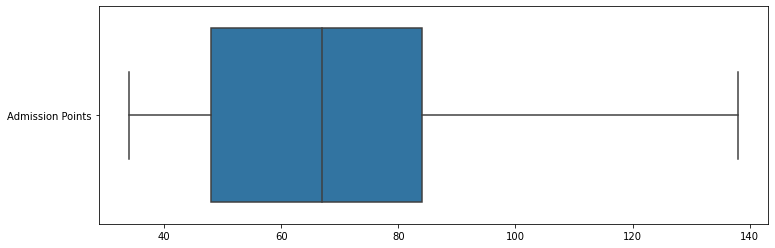

In [10]:
# Diagrama de caja
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= df_info_clean[['Admission Points']], orient="h")

Decidimos hacer es eliminar los datos atípicos de la variable objetivo, ya que a pesar de que eran pocos, consideramos que es importante asegurarnos de que los datos en la variable objetivo sean todos correctos, ya que a partir de esto se va a hacer la predicción y es la columna más importante en el proyecto. 

### Visualizacion de los datos ya limpios

In [11]:
df_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 1568
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          1502 non-null   int64  
 1   TOEFL Score        1502 non-null   int64  
 2   University Rating  1502 non-null   int64  
 3   SOP                1502 non-null   float64
 4   LOR                1502 non-null   float64
 5   CGPA               1502 non-null   float64
 6   Research           1502 non-null   int64  
 7   Admission Points   1502 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 105.6 KB


In [12]:
df_info_clean.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000
mean,307.683755,101.566578,2.872170,2.976019,3.018016,8.344953,0.468708,66.642457
std,17.828459,12.450752,1.238258,1.232877,1.211137,0.809881,0.499186,19.061924
min,257.000000,69.000000,1.000000,0.020000,0.000000,6.100000,0.000000,34.000000
25%,298.000000,96.000000,2.000000,2.000000,2.050000,7.760000,0.000000,48.000000
50%,309.000000,103.000000,3.000000,3.000000,3.000000,8.330000,0.000000,67.000000
75%,322.000000,111.000000,4.000000,4.000000,4.000000,9.047500,1.000000,84.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,138.000000


### Normalizar



Todos los datos entregados por la universidad son numéricos, pero estos tienen rangos distintos. Es por esto que normalizamos los datos, con el objetivo de facilitarle al modelo el trabajo de hacer la regresión. Sin embargo, ya que esto se hace en el Pipeline se comenta todo lo relacionado a la normalización para que no altere las predicciones

In [13]:
#mms = MinMaxScaler()

#df_info_norm= mms.fit_transform(df_info_clean.copy())
#saved_cols = df_info_clean.columns
#df_info_clean = pd.DataFrame(df_info_norm, columns =saved_cols)

#df_info_clean.to_csv('datosNormalizados.csv')

## 3. Correlacion de los datos

Para encontrar la correlación de los datos se hicieron dos métodos, se utilizaron diagramas de dispersión y una matriz de correlaciones. 

### Diagramas de dispersion

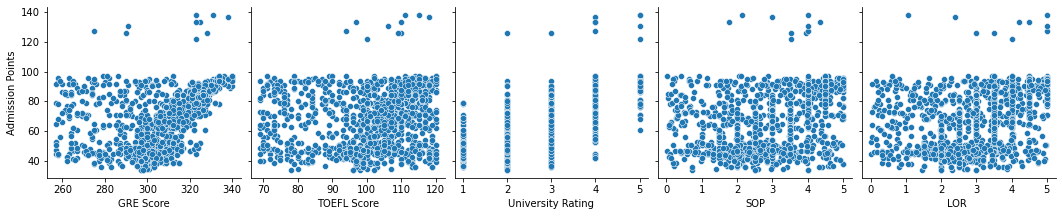

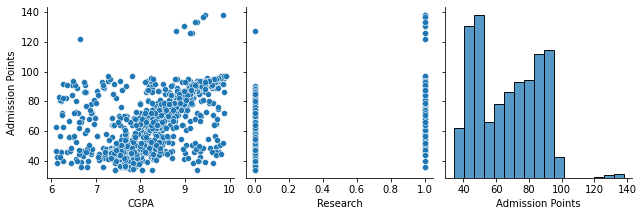

In [14]:
sns.pairplot(df_info_clean, height=3, y_vars = 'Admission Points', x_vars = df_info_clean.columns[0:5], kind='scatter')
sns.pairplot(df_info_clean, height=3, y_vars = 'Admission Points', x_vars = df_info_clean.columns[5:10], kind='scatter')
#sns.pairplot(df_info_clean, height=3, y_vars = 'Admission Points', x_vars = df_info_clean.columns[10:], kind='scatter')

Al hacer la matriz de dispersión se grafican todos los datos con respecto a la variable objetivo. En nuestro caso podemos ver que las variables “University Rating” y “Research” son variables discretas, esto puede afectar nuestro modelo ya que la regresion lineal fucniona mejor con varibles continuas. También podemos observar que la cantidad de datos que tienen en la columna de admission points un puntaje alto, son pocos, mientras que de 6 para abajo hay una mayor cantidad de información. También podemos observar que la variable admission points no tiene una distribución normal muy marcada, esto puede afectar a nuestro modelo. Para evitar estos problemas se le recomendaría a la Universidad de los Alpes suministrar más datos para hacer el modelo.

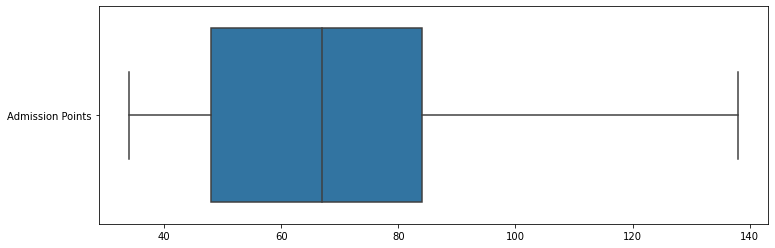

In [15]:
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= df_info_clean[['Admission Points']], orient="h")

In [16]:
#df_info_clean = df_info_clean[df_info_clean['Admission Points']<1.0]

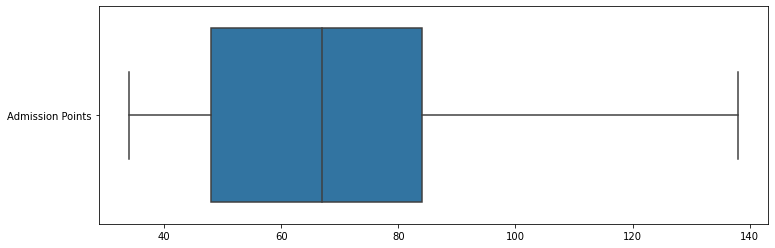

In [17]:
# Diagrama de caja
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= df_info_clean[['Admission Points']], orient="h")

### Matriz de correlaciones

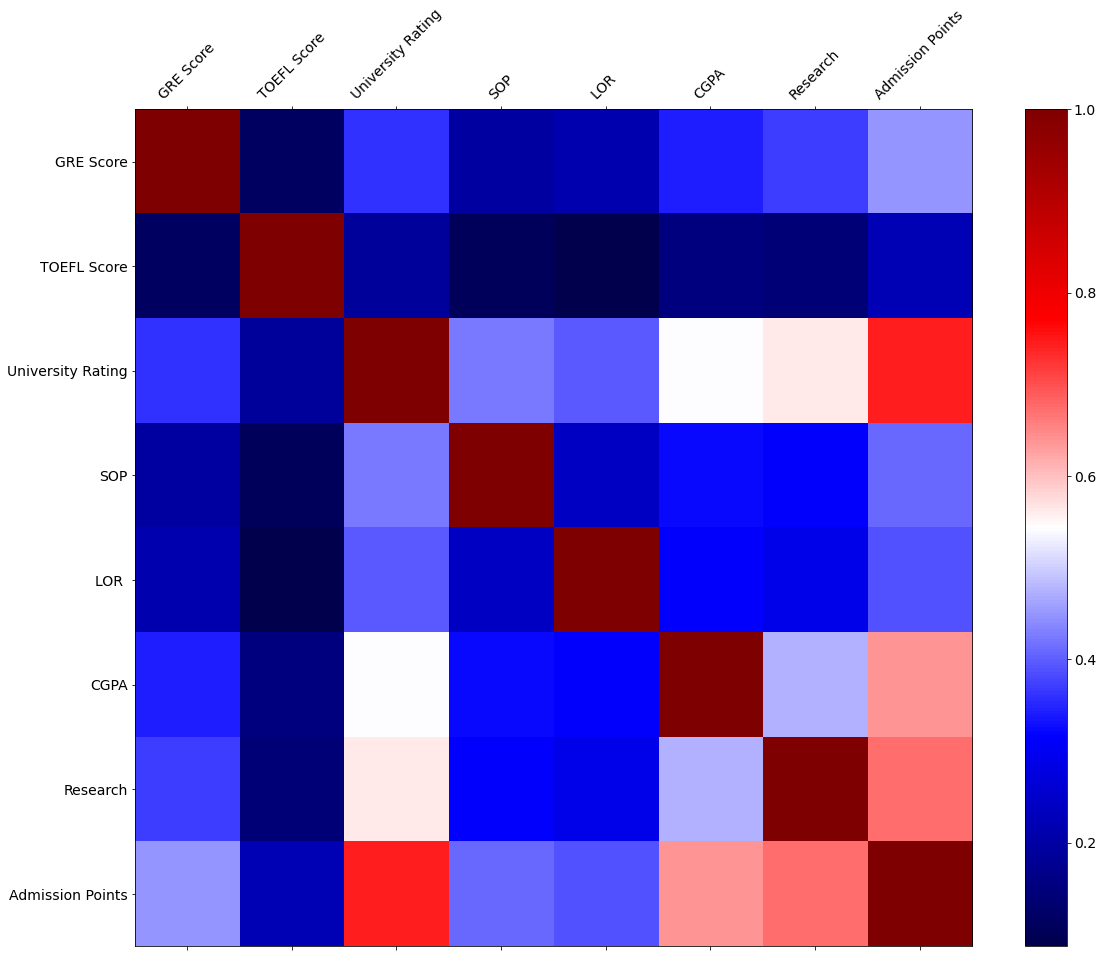

In [18]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_info_clean.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_info_clean.select_dtypes(['number']).shape[1]), df_info_clean.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_info_clean.select_dtypes(['number']).shape[1]), df_info_clean.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

En la matriz de correlaciones podemos encontrar las variables están altamente correlacionadas entre sí. Para el proyecto nos queremos enfocar en aquellas que están altamente correlacionadas con la variable objetivo. En este caso nos damos cuenta de que Admission Points está muy relacionada con University Rating, y después le sigue CDPA y Research. Estas son las columnas que se utilizarán al momento de hacer la regresión lineal, ya que con estas podemos obtener mejores resultados y será más fácil para el algoritmo encontrar la regresión lineal que le permita predecir los puntos de admisión de un estudiante. 

Se encontró que hay una alta correlacion entre University rating y la variable objetivo, que en este caso es 'Admission Points'. Esto nos esta indicando que la variable University Rating es la que más impacta en el puntaje de admision.

Al ejecutar ambas maneras de encontrar la correlacion entre los datos nos dimos cuenta que la matriz de correlaciones es la que da la informacion de manera más precisa, ya que esta encuentra un numero que representa la relacion entre todas las variables que se encuentran en los datos suministrados.

## 4. Modelo de regresion

In [19]:
# Preprocesamiento
# Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
selected_cols = ['University Rating', 'Research', 'CGPA']

pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),("scaler",MinMaxScaler())]

In [20]:
# Modelo
model = [('model', LinearRegression())]

In [21]:
# Decalra el pipeline
pipeline = Pipeline(pre+model)

In [22]:
# Extraemos las variables explicativas y objetivo para entrenar
X = df_info_clean.drop('Admission Points', axis = 1)
y = df_info_clean['Admission Points']
df_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 1568
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          1502 non-null   int64  
 1   TOEFL Score        1502 non-null   int64  
 2   University Rating  1502 non-null   int64  
 3   SOP                1502 non-null   float64
 4   LOR                1502 non-null   float64
 5   CGPA               1502 non-null   float64
 6   Research           1502 non-null   int64  
 7   Admission Points   1502 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 105.6 KB


In [23]:
#AQUI CREO EL JSON PARA PRUEBAS DEL 1ER ENDPOINT
data = {}
data['list_of_inputs']=[]
valor = 0
#print(df_info_clean['GRE Score'][10])
for i in df_info_clean['Admission Points']:
    try:
        #print(i)
        #print(df_info_clean['Admission Points'][valor])
        #print(valor)
        data['list_of_inputs'].append({
        'serial_no': valor,
        'gre_score': float(df_info_clean['GRE Score'][valor]),
        'toefl_score': float(df_info_clean['TOEFL Score'][valor]),
        'University Rating': float(df_info_clean['University Rating'][valor]),
        'sop': float(df_info_clean['SOP'][valor]),
        'lor': 0.0,
        'CGPA': float(df_info_clean['CGPA'][valor]),
        'Research': float(df_info_clean['Research'][valor])
        })
    except:
        valor +=1
    
    valor +=1
print(valor)

1568


In [24]:
with open('data.json', 'w') as file:
    json.dump(data, file, indent=4)

In [25]:
#AQUI CREO EL JSON PARA PRUEBAS DEL 2DO ENDPOINT
data2 = {}
data2['list_of_inputs']=[]
valor = 0
#print(df_info_clean['GRE Score'][10])
for i in df_info_clean['Admission Points']:
    try:
        #print(i)
        #print(df_info_clean['Admission Points'][valor])
        #print(valor)
        data2['list_of_inputs'].append({
        'serial_no': valor,
        'gre_score': float(df_info_clean['GRE Score'][valor]),
        'toefl_score': float(df_info_clean['TOEFL Score'][valor]),
        'University Rating': float(df_info_clean['University Rating'][valor]),
        'sop': float(df_info_clean['SOP'][valor]),
        'lor': 0.0,
        'CGPA': float(df_info_clean['CGPA'][valor]),
        'Research': float(df_info_clean['Research'][valor]),
        'Admission Points': float(df_info_clean['Admission Points'][valor])
        })
    except:
        valor +=1
    
    valor +=1
print(valor)

1568


In [26]:
with open('data2.json', 'w') as file:
    json.dump(data2, file, indent=4)

In [27]:
pipeline = pipeline.fit(X,y)

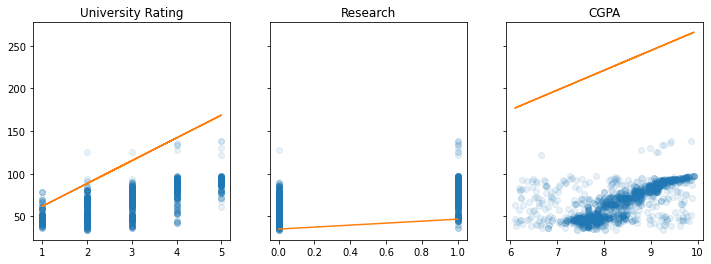

In [28]:
# Visualizamos la regresion lineal en cada dimension
f, axs = plt.subplots(1, len(selected_cols), sharey=True, figsize = (12,4))

for i in range(len(selected_cols)):

    pos_col = i
    col = selected_cols[pos_col]

    # Variable x
    x = X[col]
    # Pendiente
    m = pipeline['model'].coef_[pos_col]
    # Interceto
    b = pipeline['model'].intercept_

    axs[i].plot(x, y, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)

Cuando hacemos la regresión lineal utilizamos solo las columnas ‘University Rating’, ‘Research’ y ‘CGPA’. Al momento de hacer el pipeline y graficar los resultados de cada regresión con respecto a cada columna utilizada podemos ver que en efecto tienen una relación los datos y la regresión, ya que en todas las columnas podemos observar que a medida que aumenta el valor de las columnas elegidas, también aumenta el puntaje de admisión de cada estudiante. Esto se puede ver reflejado en la regresión ya que esta tiene una pendiente positiva, que aumenta de manera proporcional con el aumento de los puntajes de admisión de los datos suministrados. 

## 5. Exportar modelo

In [29]:
# Usamos la lbreria joblib
filename = 'modelo.joblib'
# Se guarda
dump(pipeline, filename) 

['modelo.joblib']

In [30]:
p2 = load(filename)
p2

Pipeline(steps=[('initial',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  ['University Rating',
                                                   'Research', 'CGPA'])])),
                ('scaler', MinMaxScaler()), ('model', LinearRegression())])

In [31]:
print(df_info_clean.shape)
df_info_clean.head(5)

(1502, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
0,327,113,4,4.00,2.77,8.88,1,84.47
1,301,92,1,1.85,1.50,7.71,0,45.08
2,297,100,1,2.41,1.59,7.89,0,47.42
3,303,98,3,3.50,3.00,8.50,0,62.00
4,320,94,2,1.38,3.50,8.78,1,73.00


In [32]:
# Clasificamos los datos recientes
# Eliminamos los registros que tienen la variable objetivo nula
df_info_clean = df_info_clean.dropna()
df_info_clean['Admission Points'] = p2.predict(df_info_clean)

<AxesSubplot:xlabel='Admission Points', ylabel='Count'>

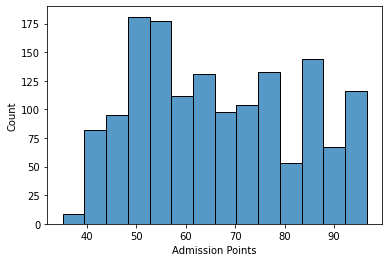

In [33]:
sns.histplot(df_info_clean['Admission Points'])

In [34]:
pipeline['model'].coef_

array([26.75351854, 11.65461703, 23.28925052])

In [35]:
# En DataFrame
pd.DataFrame({'columns':selected_cols, 'coef':pipeline['model'].coef_})

,columns,coef
0,University Rating,26.753519
1,Research,11.654617
2,CGPA,23.289251


## 6. Metricas

### 6.1 Coeficiente de determinación $R^2$

La primera métrica que tenemos es el coeficiente de determinación ($R^2$). Este valor indica que porcentaje de la varianza en la variable objetivo se puede explicar con las variables observadas. Este se define como:
$$ R^2 =  1 - \frac{\sum_{i=1}^{n} (y_i - f_i)^2}{\sum_{i=1}^{n} (y_i - \hat{y})^2}$$

donde $y_i$ es el elemento $i$ de la varaible objetivo, $f_i$ el elemento i de los valores predecidos y:

$$ \hat{y} = \frac{1}{n} \sum_{i=1}^{n} y_{i} $$

In [36]:
p2.score(X,y)
##Coeficiente de determinación

0.6949458159350574

Cuando obtenemos hacemos los coeficientes de determinación obtenemos que este es de 0.69. Esta métrica lo que nos indica es el ajuste del modelo a la variable objetivo, es por esto que, entre más cercano al uno, mejor será el modelo. En nuestro caso el número no es muy alto, sin embargo, nos demuestra que en la mayoría de los casos el modelo se ajusta bien. 

### 6.2 Root-Mean-Square Error (RMSE) 

La segunda medida es la raiz del error cuadrático medio, definido como:

$$ RSME = \sqrt{\frac{\sum_{i=1}^{n} (y_i - f_i)^2}{n}} $$

In [37]:
y_true = y
y_predicted = p2.predict(X)

# Note que hay que sacarle la raiz al valor
np.sqrt(mse(y_true, y_predicted))

10.52472158266202

Con el coeficiente del RMSE nos sucede algo parecido. Esta métrica nos refleja el ajuste del modelo a los datos, similar a la varianza los indica que tan alejados están los valores reales a los valores que predice nuestra regresión. En este modelo obtuvimos un error cuadrático medio del 10.52, lo que nos indica que los datos de la predicción no están muy alejados de los datos reales, ya que nuestro rango es de 0 a 140, por ende, la proporcion del error no es muy grande comparado a nuestro rango total.

## 7. Supuestos de la regresión lineal

### Colinealidad

Es necesario que las columnas utilizadas no tengan (o tengan muy poca) colinealidad. La forma mas sencilla de hacer esto es con la matriz de correlación

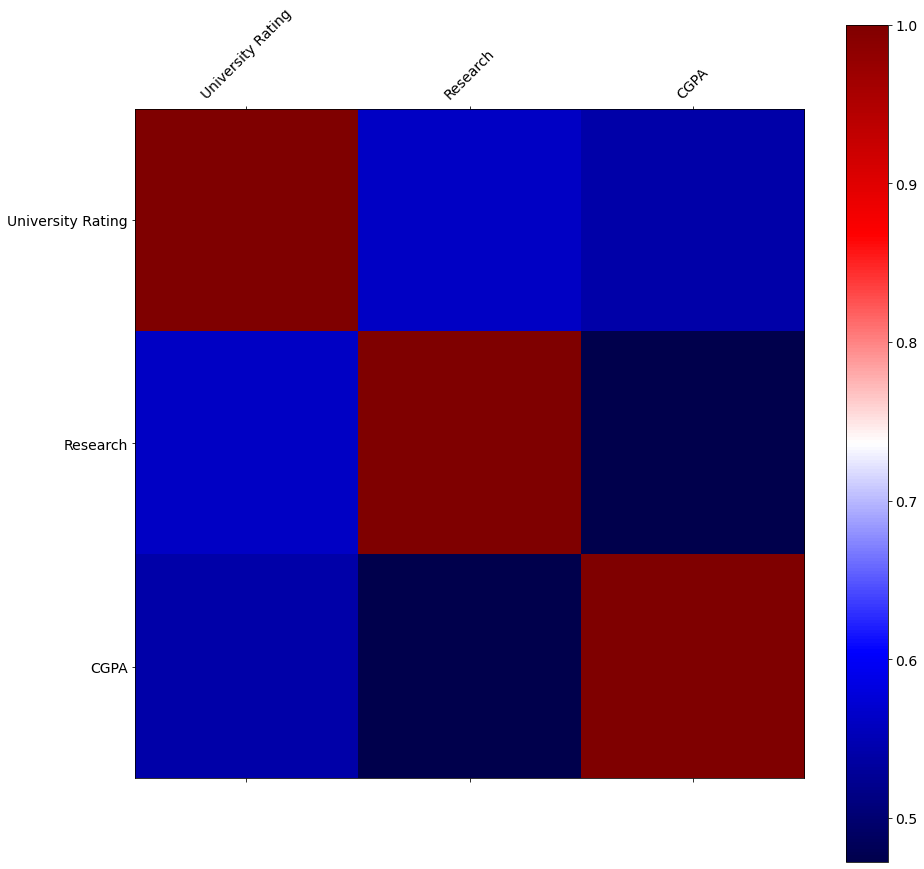

In [38]:
df_temp = df_info_clean[selected_cols]


f = plt.figure(figsize=(15, 15))
plt.matshow(df_temp.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

Vemos que CGPA y research tienen alta colinealidad entre si. Si las columnas usadas tienen alta combinación lineal, la influencia de cada uno sobre la regresión no puede distinguirse al quedar solapados unos sobre otros. Los pronosticos se vuelven poco fiables ya que variando la combinación de predictores se pueden obtener contradicciones. Pero University rating tiene una colinealidad mas baja con las demas.

### Linealidad


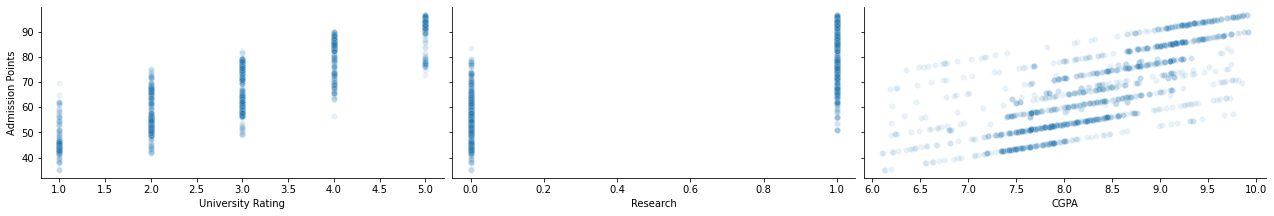

In [39]:
sns.pairplot(df_info_clean, height=3, aspect = 2, y_vars = 'Admission Points', x_vars = ['University Rating', 'Research', 'CGPA'], kind='scatter', plot_kws = {'alpha':0.1})

In [40]:
# Revisamos si CGPA tiene cierta linealidad con Admission Points 

# Creamos la variable
X = df_info_clean[['CGPA']].copy()
X['CGPA_2'] = X['CGPA']**2

# columna
col = 'CGPA_2'

pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p_temp = Pipeline(pre+model)

p_temp = p_temp.fit(X,y)

print(f"{col}: {p_temp.score(X,y)}")

CGPA_2: 0.4282169334953402


Es una linealidad por encima de 0.4, comparada con las posibilidades de university rating y research, es la que mas sentido tiene por las graficas hechas con y = Admission Points, tanto research como university rating no tienen linealidad con Admission Points

### Normalidad en los Errores

Graficos de datos:

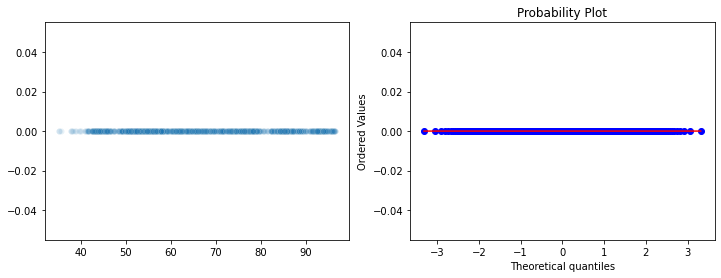

In [41]:
X = df_info_clean.drop('Admission Points', axis = 1)
y = df_info_clean['Admission Points']

# Calculamos los errores
errors = (p2.predict(X) - y).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
sns.scatterplot(x = p2.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

Al revisar la normalidad de los errores confirmamos que los datos están bien distribuidos. Tanto en el gráfico de dispersión como en el de distribución normal podemos observar que los datos están juntos en una linea recta, y en los Q-Q plots vemos que los datos siguen una linealidad clara. Lo que nos indica que los datos son apropiados para utilizar en una regresión lineal. 

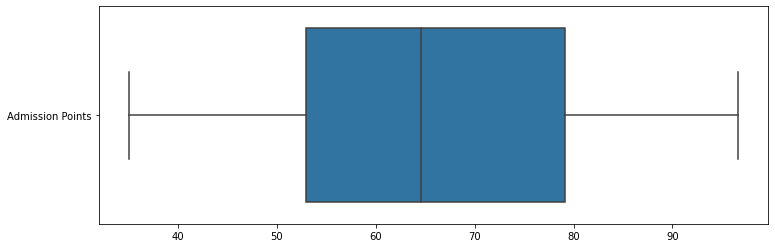

In [42]:
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= df_info_clean[['Admission Points']], orient="h")

### Varianza Constante (Homocedasticidad)

<AxesSubplot:xlabel='Admission Points'>

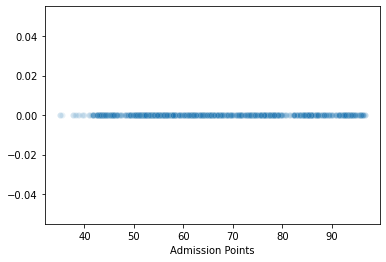

In [43]:
X = df_info_clean.drop('Admission Points', axis = 1)
y = df_info_clean['Admission Points']

# Calculamos los errores nuevamente con los datos clean
errors = (p2.predict(X) - y).values

# Visualizamos nuestros datos
sns.scatterplot(data  = df_info_clean, x = 'Admission Points', y = errors, alpha = 0.1)

Con la varianza constante podemos observar que esta es constante a medida que cambia la variable objetivo, por lo tanto, podemos asumir que al modelo no le hace falta modificar datos ni agregar más variables debido a que la varianza de los errores se mantiene constante a medida que cambia la variable objetivo. 

## 8. Evaluacion cuantitativa

Podemos ver que el modelo de predicción no es perfecto, por lo tanto, se puede tomar como una ayuda al momento de predecir el puntaje de admisión de un estudiante, sin embargo, necesita de una revisión de los resultados por parte de los expertos para descartar predicciones incorrectas. Una opción para resolver este problema es proveer más datos para hacer la regresión, ya que los datos no tenían una distribución normal y esto influyó en los resultados del modelo. 

Otra opción sería utilizar modelos supervisados de machine learning como KNN o arboles de decisión ya que estos no necesitan tener datos con distribución normal. Sin embargo, estos modelos no responderían de manera adecuada la pregunta que puntaje obtendrían los estudiantes, ya que esto es una variable objetivo continua, es por esto que el modelo podría ayudar a determinar si obtienen o no un buen puntaje de admisión. También recomendarle en este caso a la empresa conseguir más datos de personas que obtienen buenos puntajes, ya que al revisar los datos podemos observar que la mayoría de los estudiantes obtienen un puntaje de admisión menor a 6, y con esto el algoritmo no puede aprender bien a predecir los puntajes mayores a este número. 

## 9. Evaluacion cualitativa

- Validación de supuestos: como observamos antes, los supuestos de varianza constante y colinealidad son correctos. Pero podemos observar que la linealidad y la normalidad no son los mejores valores para un modelo optimo. Sin embargo, al ver los resultados del modelo, el coeficiente de determinación y el error cuadrático medio nos damos cuenta de que a pesar de que, si afectan en la predicción, el modelo no puede ser considerado totalmente inservible, ya que en la mayoría de los casos se ve una buena relación entre la regresión y los datos reales. 

- Interpretación de los coeficientes: al revisar los coeficientes de regresión podemos observar que no hay coeficientes muy altos, el más grande es University Rating con 26.75, seguido de Research con 11.65, y por último CGPA con 22.28. Lo que esto nos indica es que no se puede predecir el puntaje de admisión con un dato único, ya que ninguna variable tiene un coeficiente considerablemente alto. También nos indica que la variable más importante para determinar el puntaje de admisión de un estudiante es el puntaje de la universidad, y que en nuestro modelo el que menos afecta es la experiencia de investigación del estudiante. 

## 10. Prueba del cliente

In [44]:
import numpy as np
import pandas as pd
import joblib 

# Proceso de prubea del cliente
filename = 'modelo.joblib' # Ubicación del archivo entregado
#df_recent = pd.read_csv('university_admission_test.csv') # Lectura de los datos recientes

# Lee el archivo y carga el modelo
#pipeline = load(filename)

#y_true = pd.read_csv('Recientes_Validacion.csv') # La columna que solo el cliente tiene#
#y_predicted =  pipeline.predict(df_recent)

# Calcula el desempeño del modelo
#np.sqrt(mse(y_true, y_predicted))
